In [2]:
import torch
import numpy as np
array=[[1,2,3,4,5,6]]
print(array)

[[1, 2, 3, 4, 5, 6]]


In [3]:
tensor=torch.tensor(array)
print(tensor)


tensor([[1, 2, 3, 4, 5, 6]])


In [4]:
narray=np.array(array)
print(narray)


[[1 2 3 4 5 6]]


In [5]:
narr_to_tensor=torch.tensor(narray)
print(narr_to_tensor)

tensor([[1, 2, 3, 4, 5, 6]], dtype=torch.int32)


In [6]:
tensor_to_narr=tensor.numpy()
print(tensor_to_narr)


[[1 2 3 4 5 6]]


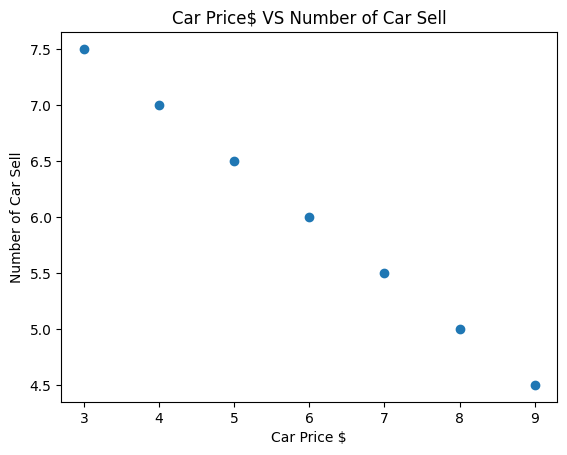

In [7]:
from torch.autograd import Variable
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array,dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

import matplotlib.pyplot as plt
plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

In [ ]:
import torch.nn as nn
import warnings
warnings.filterwarnings("ignore")

class LinearRegressionModel(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(LinearRegressionModel,self).__init__()
        self.linear=nn.Linear(input_dim,output_dim)
    def forward(self,x):
        return self.linear(x)

input_dim=1
output_dim=1
model=LinearRegressionModel(input_dim,output_dim)

mse=nn.MSELoss()
learning_rate=0.02
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

loss_list=[]
iteration_number=1001
for iteration in range(iteration_number):
    optimizer.zero_grad() # model initialize
    results=model(car_price_tensor)
    loss=mse(results,number_of_car_sell_tensor)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.data)


tensor([[-3.5609],
        [-4.4984],
        [-5.4358],
        [-6.3732],
        [-7.3106],
        [-8.2481],
        [-9.1855]], grad_fn=<AddmmBackward0>)
tensor([[7.3972],
        [6.9254],
        [6.4535],
        [5.9817],
        [5.5098],
        [5.0380],
        [4.5662]], grad_fn=<AddmmBackward0>)


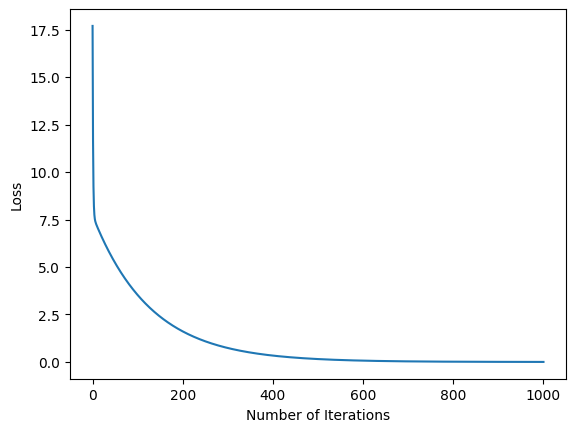

In [9]:
plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

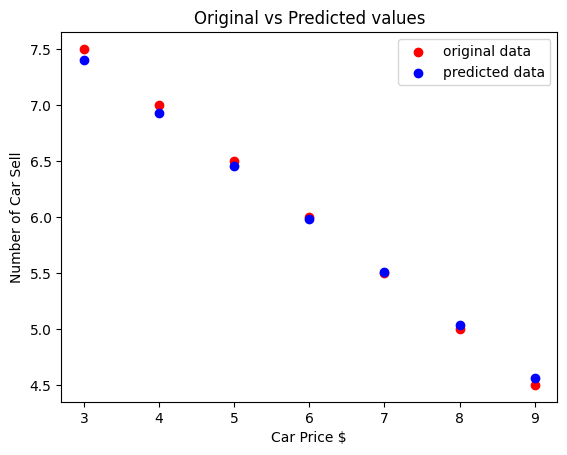

In [10]:
predicted=model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array,number_of_car_sell_array,label="original data",color='red')
plt.scatter(car_prices_array,predicted,label="predicted data",color='blue')
plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()